<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/Fetal-Health-Classification/blob/main/Fetal_Health_Classification_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**


---

# PROJETO REGRESSÃO

Como falamos antes, nossos templates ficarão cada vez mais simples!!

O objetivo deste projeto é desenvolver um projeto para classificar o estado de saúde de fetos em uma maternidade, com [esses dados do Kaggle](https://www.kaggle.com/andrewmvd/fetal-health-classification).


Artigos Referência:

[Prenatal Monitoring of Perinatal Pregnant Women and Fetus Based on a Smart Electronic Fetal Monitoring System](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj2ybG9kNWIAxVNI7kGHbCSIecQFnoECC4QAQ&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FAnalysis-of-the-fetal-heart-rate-baseline-by-a-histogram-method_fig3_365588798&usg=AOvVaw1SQfIj1Jwni16_7cBzR8vm&opi=89978449)

[What is the "normal" fetal heart rate?](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj2ybG9kNWIAxVNI7kGHbCSIecQFnoECBMQAQ&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FHistogram-of-baseline-fetal-heart-rate-values-A-Training-data-B-Validation-data-C_fig1_237199969&usg=AOvVaw3k1KptISfHQiNmQNw_Y-Yj&opi=89978449)

On This Dataset Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

- 1 (Normal)
- 2 (Suspect)
- 3 (Pathological)


**Features:**

- *baseline value* : FHR baseline (beats per minute)
- *accelerations* : Number of accelerations per second
- *fetal_movement* : Number of fetal movements per second
- *uterine_contractions* : Number of uterine contractions per second
- *light_decelerations* : Number of light decelerations per second
- *severe_decelerations* : Number of severe decelerations per second
- *prolongued_decelerations* : Number of prolonged decelerations per second
- *abnormal_short_term_variability* : Percentage of time with abnormal short term variability
- *mean_value_of_short_term_variability* : Mean value of short term variability
- *percentage_of_time_with_abnormal_long_term_variability* : Percentage of time with abnormal long term variability
- *mean_value_of_long_term_variability* : Mean value of long term variability
- *histogram_width* : Width of FHR histogram
- *histogram_min* : Minimum (low frequency) of FHR histogram
- *histogram_max* : Maximum (high frequency) of FHR histogram
- *histogram_number_of_peaks* : Number of histogram peaks
- *histogram_number_of_zeroes* : Number of histogram zeros
- *histogram_mode* : Histogram mode
- *histogram_mean* : Histogram mean
- *histogram_median* : Histogram median
- *histogram_variance* : Histogram variance
- *histogram_tendency* : Histogram tendency

## Configurando Ambiente

In [1]:
# instalando as bibliotecas necessárias
#!pip install scipy==1.9.3 -q
!pip install pycaret -q
!pip install mlflow -q
# !pip install shap -q

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import(setup,
                                   compare_models,
                                   create_model,
                                   predict_model)
from pycaret.classification import (tune_model,
                                    plot_model,
                                    evaluate_model,
                                    get_metrics)
from pycaret.classification import (save_model,
                                    load_model,
                                    finalize_model)


import warnings
#warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

## EDA

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/gabriel-cm-saldanha/Fetal-Health-Classification/main/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df[df['histogram_mean'] > df['histogram_max']]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<Axes: xlabel='fetal_health', ylabel='baseline value'>

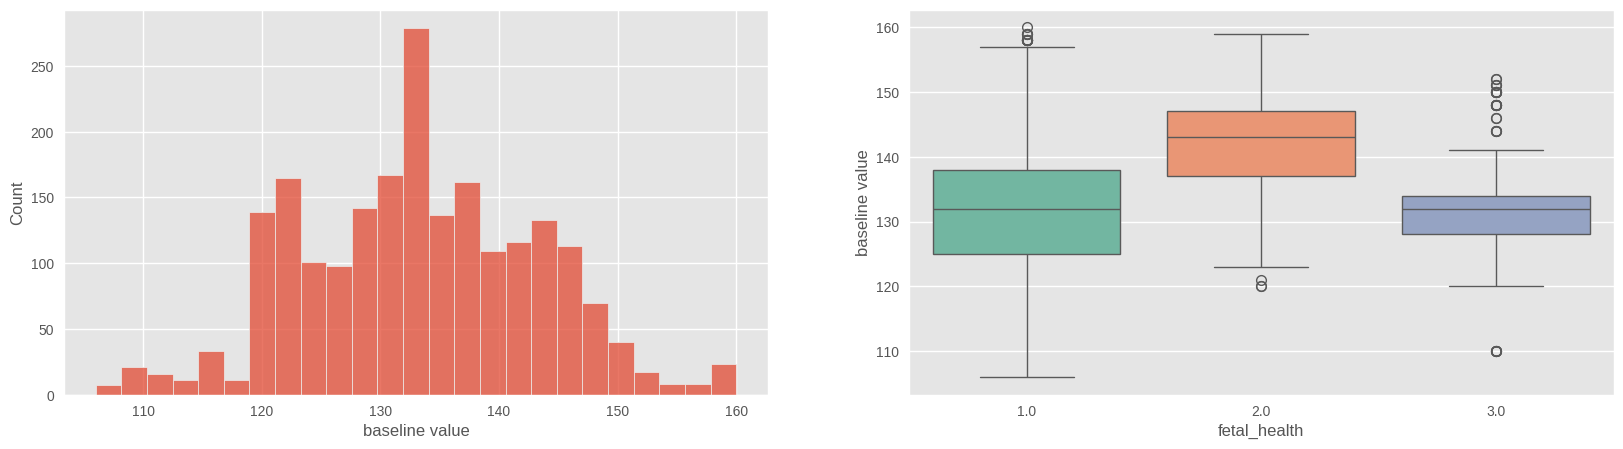

In [7]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.histplot(df['baseline value'], ax=ax[0])
sns.boxplot(data=df, x='fetal_health', y='baseline value', palette='Set2', ax=ax[1])

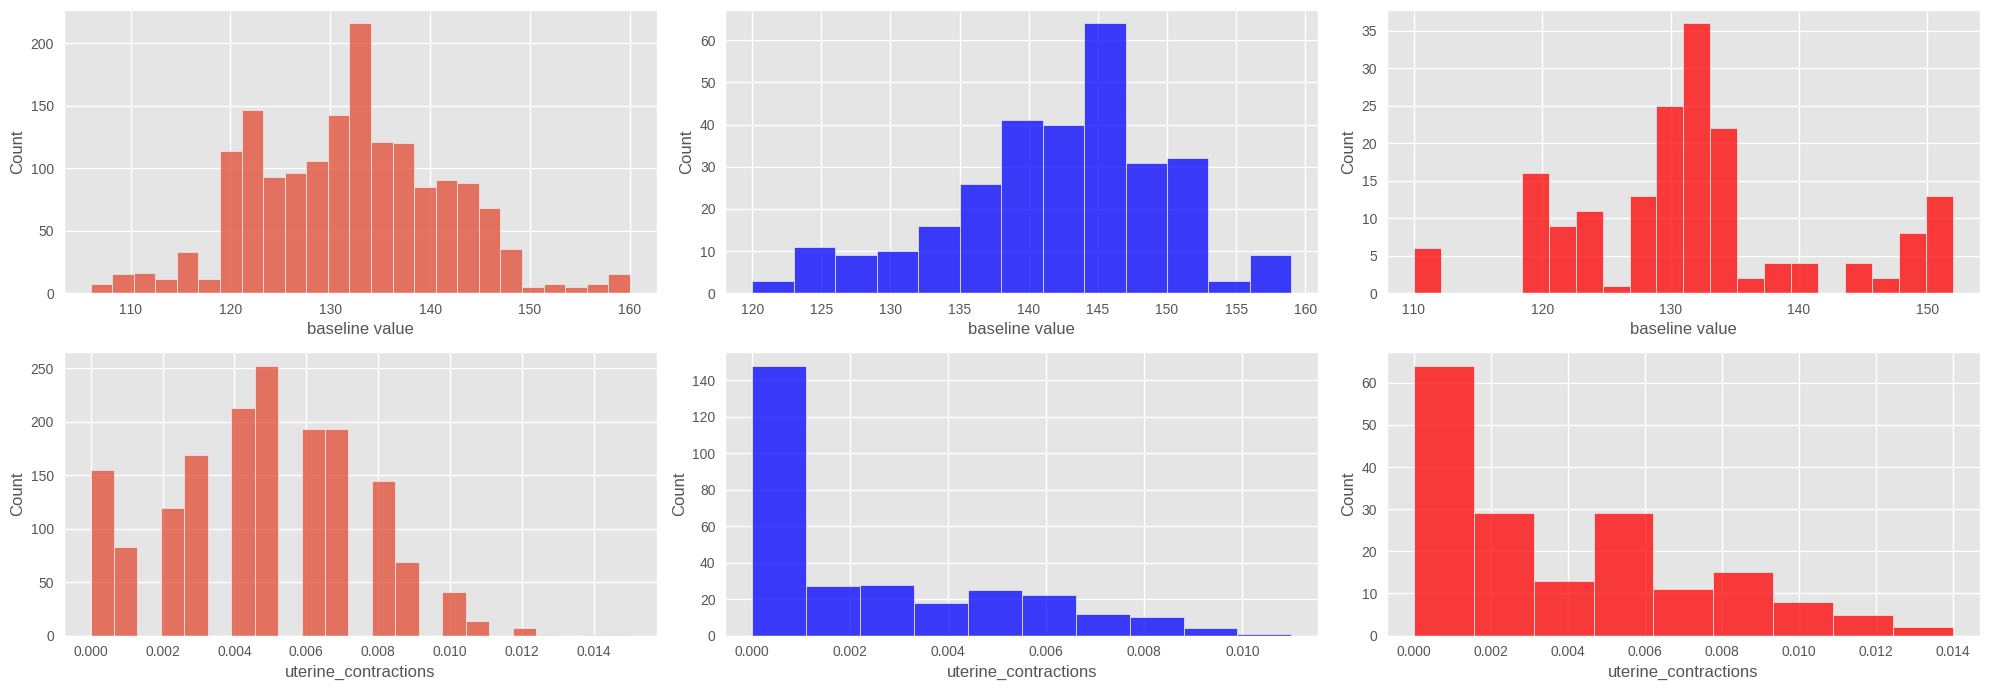

In [8]:
normal = df[df['fetal_health'] == 1]
suspect = df[df['fetal_health'] == 2]
pathological = df[df['fetal_health'] == 3]


fig, ax = plt.subplots(2,3, figsize=(20,7))
sns.histplot(normal['baseline value'], ax=ax[0,0])
sns.histplot(suspect['baseline value'], ax=ax[0,1], color='blue')
sns.histplot(pathological['baseline value'],ax=ax[0,2], color='red')

sns.histplot(normal['uterine_contractions'], ax=ax[1,0])
sns.histplot(suspect['uterine_contractions'], ax=ax[1,1], color='blue')
sns.histplot(pathological['uterine_contractions'],ax=ax[1,2], color='red')

plt.tight_layout()

<Axes: xlabel='histogram_variance', ylabel='Count'>

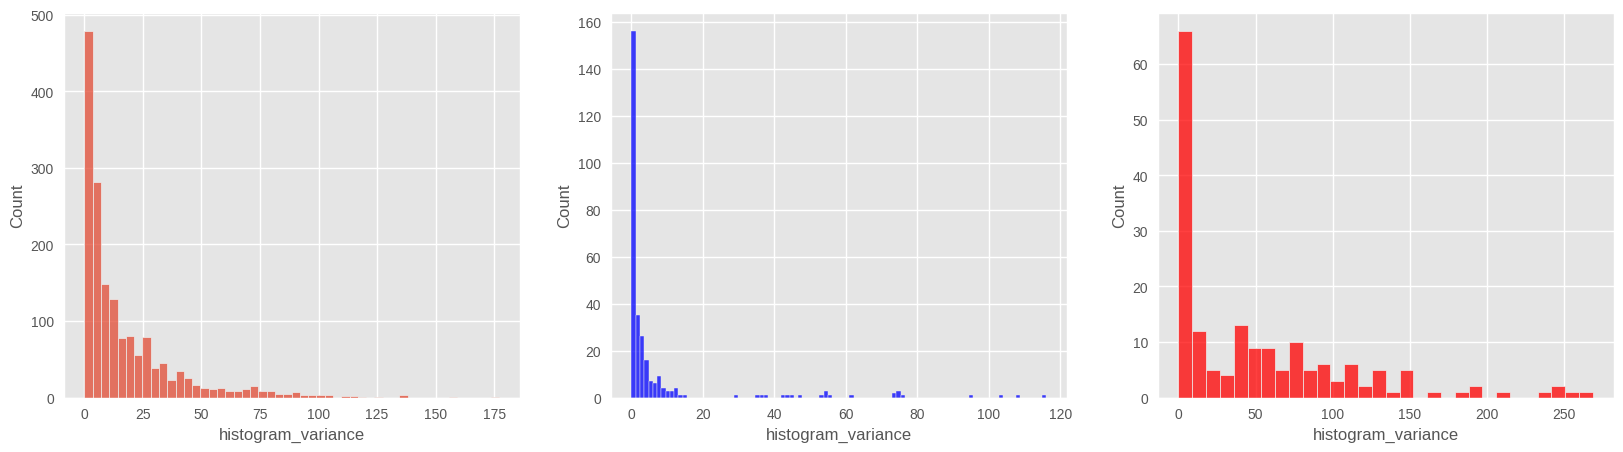

In [9]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.histplot(normal['histogram_variance'], ax=ax[0])
sns.histplot(suspect['histogram_variance'], ax=ax[1], color='blue')
sns.histplot(pathological['histogram_variance'],ax=ax[2], color='red',bins=30)

### Analise de Outliers

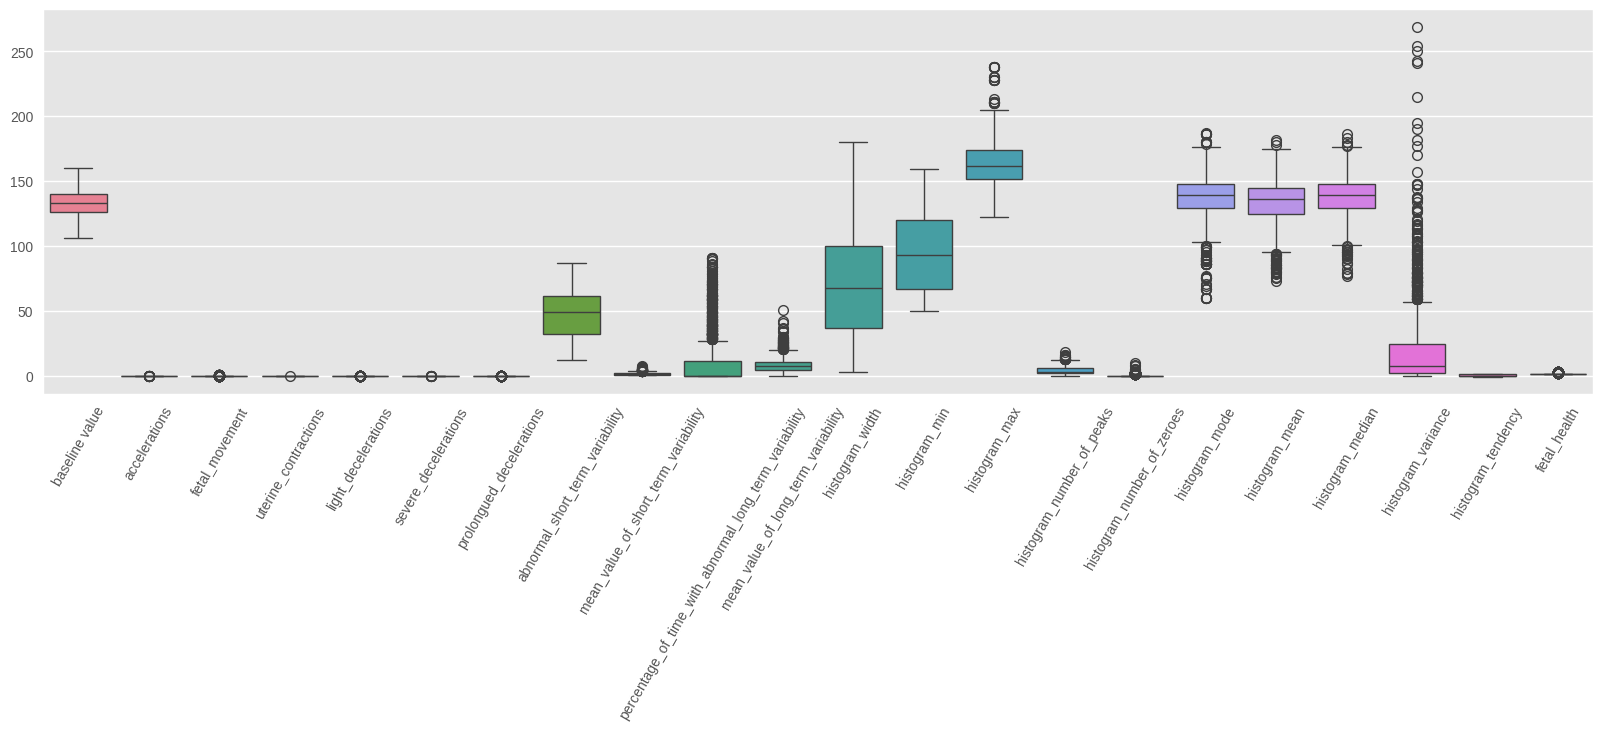

In [10]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df)
plt.xticks(rotation=60)
plt.show()

In [11]:
for coluna in df.columns:
  Q1 = df[coluna].quantile(0.25)
  Q3 = df[coluna].quantile(0.75)
  IQR = Q3 - Q1
  lim_inferior = Q1 - 1.5 * IQR
  lim_superior = Q3 + 1.5 * IQR
  outliers = df[(df[coluna] < lim_inferior) | (df[coluna] > lim_superior)]
  print(f'outliers na coluna {coluna}: {outliers.shape[0]}')

outliers na coluna baseline value: 0
outliers na coluna accelerations: 14
outliers na coluna fetal_movement: 307
outliers na coluna uterine_contractions: 1
outliers na coluna light_decelerations: 150
outliers na coluna severe_decelerations: 7
outliers na coluna prolongued_decelerations: 178
outliers na coluna abnormal_short_term_variability: 0
outliers na coluna mean_value_of_short_term_variability: 70
outliers na coluna percentage_of_time_with_abnormal_long_term_variability: 309
outliers na coluna mean_value_of_long_term_variability: 71
outliers na coluna histogram_width: 0
outliers na coluna histogram_min: 0
outliers na coluna histogram_max: 24
outliers na coluna histogram_number_of_peaks: 19
outliers na coluna histogram_number_of_zeroes: 502
outliers na coluna histogram_mode: 73
outliers na coluna histogram_mean: 45
outliers na coluna histogram_median: 28
outliers na coluna histogram_variance: 184
outliers na coluna histogram_tendency: 0
outliers na coluna fetal_health: 471


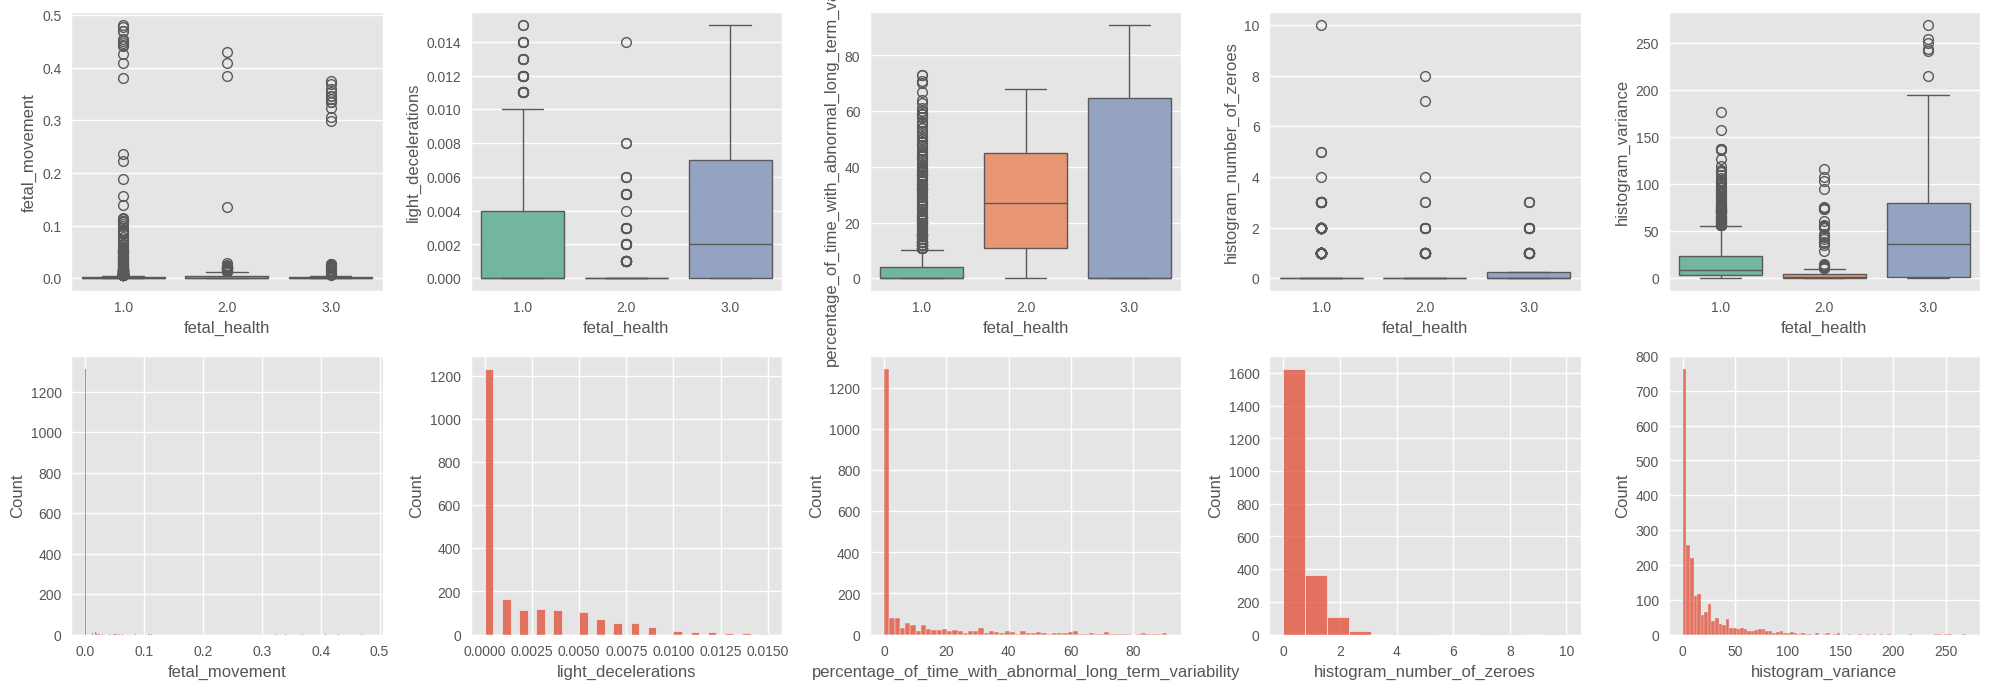

In [12]:
outliers = ['fetal_movement', 'light_decelerations', 'percentage_of_time_with_abnormal_long_term_variability','histogram_number_of_zeroes','histogram_variance']

fig, ax = plt.subplots(2,5, figsize=(20,7))
for i, col in enumerate(outliers):
  sns.boxplot(data=df, x='fetal_health', y=col, ax=ax[0,i], palette='Set2')
  sns.histplot(df[col], ax=ax[1,i])
plt.tight_layout()

### Analisando a correlação

<Axes: >

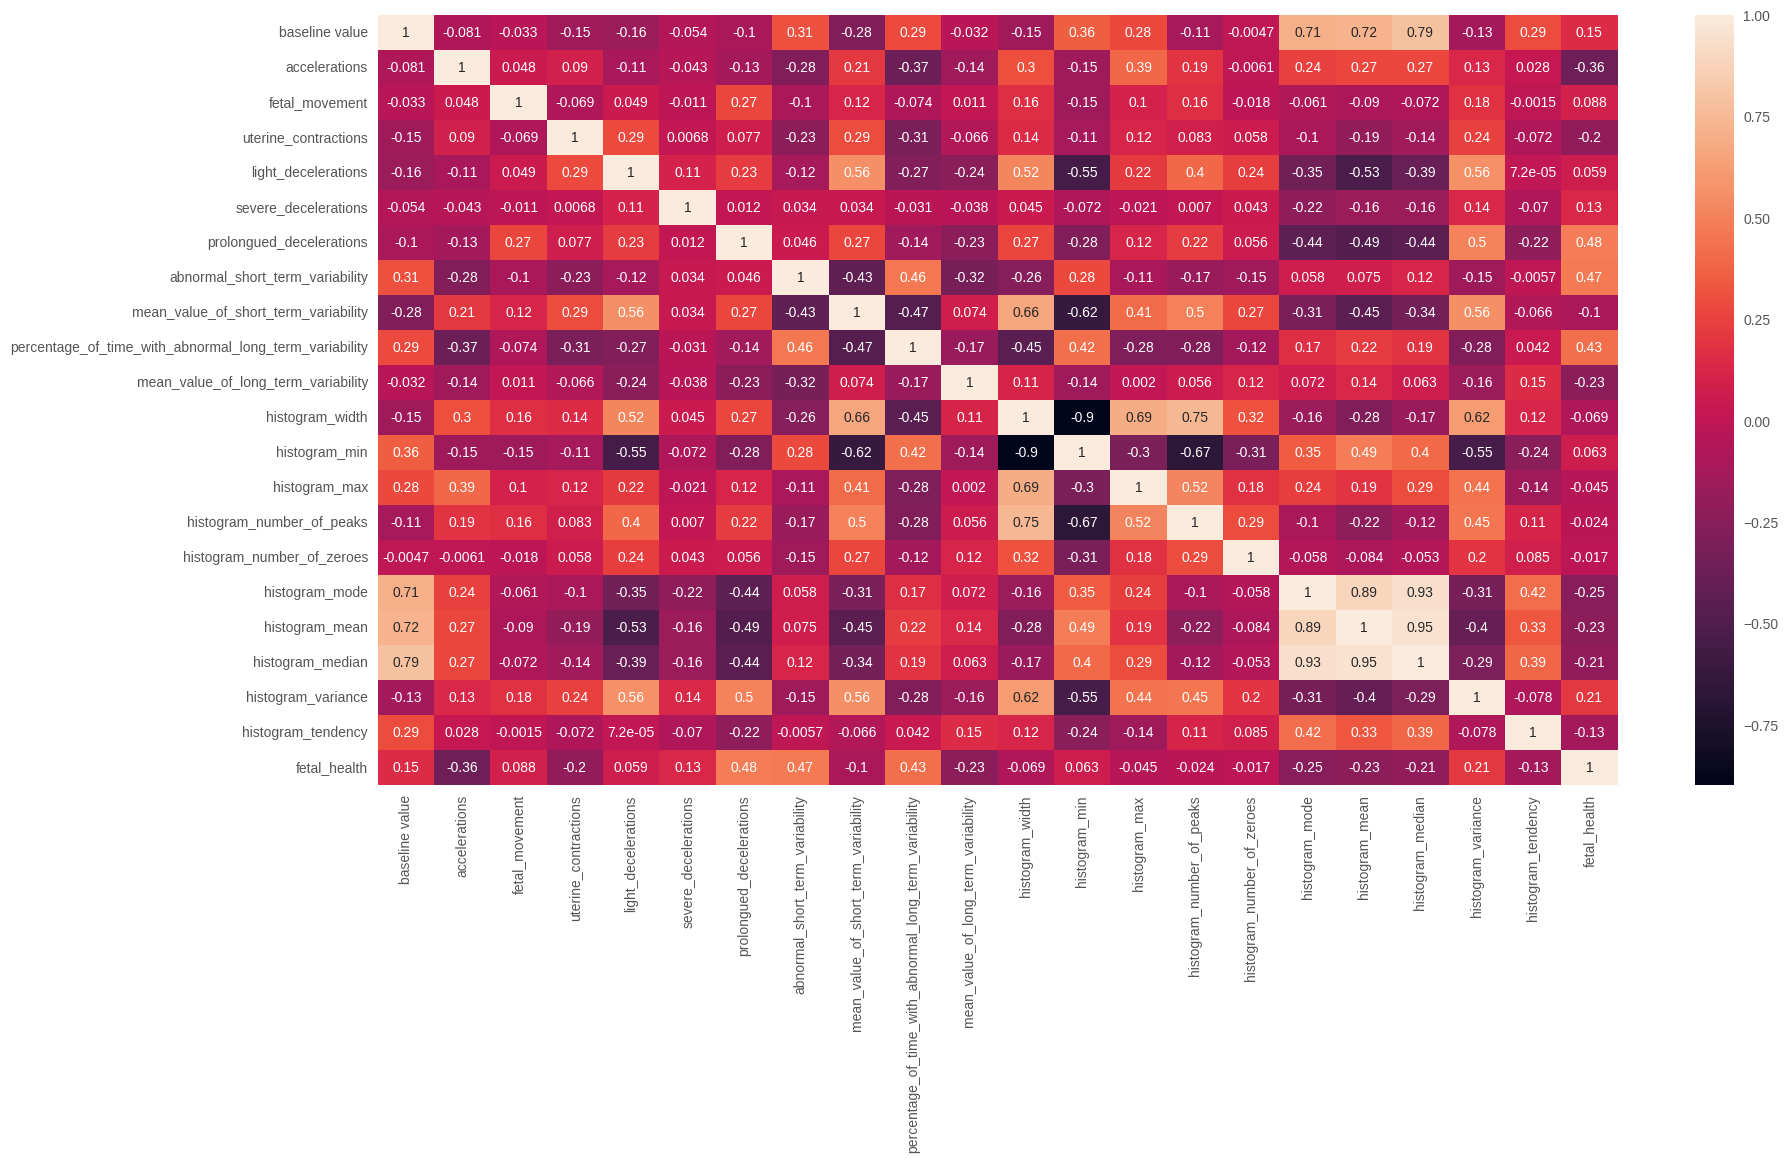

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

## Machine Learning

In [14]:
validation = df.sample(frac=0.2, random_state=42)
train = df.drop(validation.index)

validation.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [15]:
clf = setup(
    data=train,
    target='fetal_health',
    train_size=0.7
)

,Description,Value
0,Session id,2383
1,Target,fetal_health
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2"
4,Original data shape,"(1701, 22)"
5,Transformed data shape,"(1701, 22)"
6,Transformed train set shape,"(1190, 22)"
7,Transformed test set shape,"(511, 22)"
8,Numeric features,21
9,Preprocess,True


In [16]:
best = compare_models(n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9504,0.9890,0.9504,0.9505,0.9491,0.8611,0.8631,1.0500
xgboost,Extreme Gradient Boosting,0.9471,0.9892,0.9471,0.9467,0.9453,0.8504,0.8526,0.3400
catboost,CatBoost Classifier,0.9420,0.9864,0.9420,0.9424,0.9403,0.8369,0.8395,6.4780
gbc,Gradient Boosting Classifier,0.9345,0.0000,0.9345,0.9332,0.9323,0.8147,0.8174,1.1350
rf,Random Forest Classifier,0.9294,0.9847,0.9294,0.9278,0.9261,0.7975,0.8019,0.3480
et,Extra Trees Classifier,0.9151,0.9824,0.9151,0.9120,0.9099,0.7532,0.7603,0.3590
dt,Decision Tree Classifier,0.9143,0.8766,0.9143,0.9148,0.9132,0.7633,0.7655,0.0510
lr,Logistic Regression,0.8748,0.0000,0.8748,0.8630,0.8617,0.6204,0.6337,1.2530
knn,K Neighbors Classifier,0.8739,0.9137,0.8739,0.8663,0.8654,0.6257,0.6353,0.0600
ada,Ada Boost Classifier,0.8739,0.0000,0.8739,0.8716,0.8681,0.6349,0.6417,0.3050


Processing:   0%|          | 0/72 [00:00<?, ?it/s]

In [23]:
best[0]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2383, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [24]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9328,0.9858,0.9328,0.9315,0.9281,0.8005,0.8077
1,0.9412,0.9891,0.9412,0.9388,0.9386,0.8337,0.8352
2,0.9580,0.9970,0.9580,0.9613,0.9565,0.8813,0.8839
3,0.9160,0.9758,0.9160,0.9132,0.9129,0.7539,0.7576
4,0.9496,0.9867,0.9496,0.9510,0.9501,0.8636,0.8638
5,0.9748,0.9900,0.9748,0.9749,0.9746,0.9330,0.9331
6,0.9412,0.9837,0.9412,0.9412,0.9412,0.8434,0.8434
7,0.9496,0.9895,0.9496,0.9487,0.9477,0.8598,0.8622
8,0.9832,0.9972,0.9832,0.9840,0.9829,0.9546,0.9552


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
param_grid = {'learning_rate': [x / 10 for x in range(1, 10)],
              'num_leaves': range(1,50,2),
              'n_estimators': range(0,1000,50)}

tuned_model = tune_model(model, optimize='auc', custom_grid=param_grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,0.9837,0.9412,0.9401,0.9381,0.8282,0.8328
1,0.9496,0.9890,0.9496,0.9534,0.9468,0.8554,0.8597
2,0.9580,0.9971,0.9580,0.9600,0.9575,0.8812,0.8828
3,0.9076,0.9761,0.9076,0.9063,0.9057,0.7336,0.7356
4,0.9496,0.9887,0.9496,0.9501,0.9496,0.8614,0.8615
5,0.9664,0.9890,0.9664,0.9661,0.9655,0.9093,0.9099
6,0.9412,0.9812,0.9412,0.9412,0.9412,0.8434,0.8434
7,0.9496,0.9933,0.9496,0.9482,0.9480,0.8596,0.8618
8,0.9832,0.9971,0.9832,0.9840,0.9829,0.9546,0.9552


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [36]:
tuned_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=21, objective=None,
               random_state=2383, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

### CatBoosting

In [48]:
best[2]

{'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 2383}

In [37]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9160,0.9777,0.9160,0.9113,0.9100,0.7506,0.7574
1,0.9412,0.9839,0.9412,0.9412,0.9368,0.8313,0.8355
2,0.9580,0.9916,0.9580,0.9594,0.9559,0.8773,0.8822
3,0.9076,0.9820,0.9076,0.9063,0.9057,0.7336,0.7356
4,0.9496,0.9833,0.9496,0.9538,0.9505,0.8654,0.8668
5,0.9580,0.9887,0.9580,0.9573,0.9562,0.8850,0.8866
6,0.9244,0.9787,0.9244,0.9272,0.9248,0.7954,0.7959
7,0.9496,0.9865,0.9496,0.9482,0.9480,0.8596,0.8618
8,0.9664,0.9987,0.9664,0.9683,0.9659,0.9078,0.9095


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
tuned_catboost = tune_model(catboost, optimize='AUC', search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9076,0.9698,0.9076,0.9016,0.8992,0.7211,0.7309
1,0.9328,0.9805,0.9328,0.9315,0.9281,0.8005,0.8077
2,0.9496,0.9868,0.9496,0.9487,0.9477,0.8550,0.8576
3,0.9076,0.9711,0.9076,0.9063,0.9057,0.7336,0.7356
4,0.9244,0.9748,0.9244,0.9226,0.9231,0.7856,0.7865
5,0.9412,0.9907,0.9412,0.9417,0.9385,0.8391,0.8415
6,0.9328,0.9821,0.9328,0.9338,0.9311,0.8125,0.8149
7,0.9328,0.9842,0.9328,0.9309,0.9302,0.8098,0.8135
8,0.9748,0.9961,0.9748,0.9750,0.9747,0.9318,0.9321


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 1190 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9160,0.0000,0.9160,0.9113,0.9100,0.7506,0.7574
1,0.9412,0.0000,0.9412,0.9410,0.9385,0.8311,0.8342
2,0.9496,0.0000,0.9496,0.9487,0.9477,0.8550,0.8576
3,0.8992,0.0000,0.8992,0.8956,0.8957,0.7047,0.7081
4,0.9328,0.0000,0.9328,0.9321,0.9322,0.8123,0.8126
5,0.9244,0.0000,0.9244,0.9234,0.9228,0.7991,0.7997
6,0.9412,0.0000,0.9412,0.9412,0.9412,0.8434,0.8434
7,0.9412,0.0000,0.9412,0.9390,0.9385,0.8338,0.8377
8,0.9580,0.0000,0.9580,0.9577,0.9577,0.8863,0.8866


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_gbc = tune_model(gbc, optimize='recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:10:51
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
plot_model(tuned_catboost, plot='confusion_matrix')

In [ ]:
plot_model(tuned_catboost, plot='feature')

In [ ]:
evaluate_model(tuned_catboost)

In [ ]:
finalized_catboost = finalize_model(tuned_catboost)

In [ ]:
predict_model(finalized_catboost, data=validation).head()

In [ ]:
save_model(finalized_model, 'Modelo_Final')

## Carregar Modelo

In [ ]:
load_model('Modelo_Final')